In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from frozenlist import FrozenList

In [2]:
# 준비작업
import pandas as pd
import numpy as np

import folium
import json

import matplotlib.pyplot as plt
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
franchise = pd.read_excel('franchise.xlsx')
franchise

,Unnamed: 0,year,quarter,gu,dong,industry,franchise,normal_store
0,0,2015,1,종로구,전체,외식업/한식음식점,208,"2,887"
1,1,2015,1,종로구,청운효자동,외식업/한식음식점,5,76
2,2,2015,1,종로구,사직동,외식업/한식음식점,33,391
3,3,2015,1,종로구,삼청동,외식업/한식음식점,2,73
4,4,2015,1,종로구,부암동,외식업/한식음식점,2,41
...,...,...,...,...,...,...,...,...
175105,175105,2020,1,강동구,성내2동,외식업/커피-음료,10,46
175106,175106,2020,1,강동구,성내3동,외식업/커피-음료,13,59
175107,175107,2020,1,강동구,길동,외식업/커피-음료,23,55
175108,175108,2020,1,강동구,둔촌1동,외식업/커피-음료,0,1


In [4]:
franchise.reset_index(drop=True)

,Unnamed: 0,year,quarter,gu,dong,industry,franchise,normal_store
0,0,2015,1,종로구,전체,외식업/한식음식점,208,"2,887"
1,1,2015,1,종로구,청운효자동,외식업/한식음식점,5,76
2,2,2015,1,종로구,사직동,외식업/한식음식점,33,391
3,3,2015,1,종로구,삼청동,외식업/한식음식점,2,73
4,4,2015,1,종로구,부암동,외식업/한식음식점,2,41
...,...,...,...,...,...,...,...,...
175105,175105,2020,1,강동구,성내2동,외식업/커피-음료,10,46
175106,175106,2020,1,강동구,성내3동,외식업/커피-음료,13,59
175107,175107,2020,1,강동구,길동,외식업/커피-음료,23,55
175108,175108,2020,1,강동구,둔촌1동,외식업/커피-음료,0,1


In [5]:
franchise.set_index('Unnamed: 0')

,year,quarter,gu,dong,industry,franchise,normal_store
Unnamed: 0,,,,,,,
0,2015,1,종로구,전체,외식업/한식음식점,208,"2,887"
1,2015,1,종로구,청운효자동,외식업/한식음식점,5,76
2,2015,1,종로구,사직동,외식업/한식음식점,33,391
3,2015,1,종로구,삼청동,외식업/한식음식점,2,73
4,2015,1,종로구,부암동,외식업/한식음식점,2,41
...,...,...,...,...,...,...,...
175105,2020,1,강동구,성내2동,외식업/커피-음료,10,46
175106,2020,1,강동구,성내3동,외식업/커피-음료,13,59
175107,2020,1,강동구,길동,외식업/커피-음료,23,55


In [6]:
franchise = franchise[franchise['dong']!='전체']

In [7]:
franchise.reset_index()

,index,Unnamed: 0,year,quarter,gu,dong,industry,franchise,normal_store
0,1,1,2015,1,종로구,청운효자동,외식업/한식음식점,5,76
1,2,2,2015,1,종로구,사직동,외식업/한식음식점,33,391
2,3,3,2015,1,종로구,삼청동,외식업/한식음식점,2,73
3,4,4,2015,1,종로구,부암동,외식업/한식음식점,2,41
4,5,5,2015,1,종로구,평창동,외식업/한식음식점,5,70
...,...,...,...,...,...,...,...,...,...
165355,175105,175105,2020,1,강동구,성내2동,외식업/커피-음료,10,46
165356,175106,175106,2020,1,강동구,성내3동,외식업/커피-음료,13,59
165357,175107,175107,2020,1,강동구,길동,외식업/커피-음료,23,55
165358,175108,175108,2020,1,강동구,둔촌1동,외식업/커피-음료,0,1


# 커피 / 일반 외식업 분리 // 용산구, 마포구, 종로구 데이터만 분리

In [8]:
yongsan = franchise[franchise['gu']=='용산구']

In [9]:
yongsan_coffee = yongsan[yongsan['industry']=='외식업/커피-음료']

In [10]:
yongsan

,Unnamed: 0,year,quarter,gu,dong,industry,franchise,normal_store
35,35,2015,1,용산구,후암동,외식업/한식음식점,3,67
36,36,2015,1,용산구,용산2가동,외식업/한식음식점,3,30
37,37,2015,1,용산구,남영동,외식업/한식음식점,19,199
38,38,2015,1,용산구,청파동,외식업/한식음식점,15,150
39,39,2015,1,용산구,원효로1동,외식업/한식음식점,11,171
...,...,...,...,...,...,...,...,...
174707,174707,2020,1,용산구,이태원1동,외식업/커피-음료,12,48
174708,174708,2020,1,용산구,이태원2동,외식업/커피-음료,4,45
174709,174709,2020,1,용산구,한남동,외식업/커피-음료,21,100
174710,174710,2020,1,용산구,서빙고동,외식업/커피-음료,2,17


In [11]:
yongsan_coffee = pd.DataFrame({'year':yongsan_coffee['year'], 'qu':yongsan_coffee['quarter'],'dong':yongsan_coffee['dong'], 'franchise':yongsan_coffee['franchise'], 'normal_store':yongsan_coffee['normal_store']})
yongsan_coffee

,year,qu,dong,franchise,normal_store
12158,2015,1,후암동,0,19
12159,2015,1,용산2가동,2,14
12160,2015,1,남영동,9,37
12161,2015,1,청파동,10,62
12162,2015,1,원효로1동,5,24
...,...,...,...,...,...
174707,2020,1,이태원1동,12,48
174708,2020,1,이태원2동,4,45
174709,2020,1,한남동,21,100
174710,2020,1,서빙고동,2,17


In [12]:
yongsan_coffee = yongsan_coffee.reset_index(drop=True)

In [13]:
yongsan_coffee.reset_index(drop=True)
yongsan_coffee

,year,qu,dong,franchise,normal_store
0,2015,1,후암동,0,19
1,2015,1,용산2가동,2,14
2,2015,1,남영동,9,37
3,2015,1,청파동,10,62
4,2015,1,원효로1동,5,24
...,...,...,...,...,...
619,2020,1,이태원1동,12,48
620,2020,1,이태원2동,4,45
621,2020,1,한남동,21,100
622,2020,1,서빙고동,2,17


In [14]:
yongsan_food = yongsan[yongsan['industry']!="외식업/커피-음료"]

In [15]:
yongsan_food = pd.DataFrame({'year':yongsan_food['year'], 'qu':yongsan_food['quarter'],'dong':yongsan_food['dong'], 'franchise':yongsan_food['franchise'], 'normal_store':yongsan_food['normal_store']})
yongsan_food

,year,qu,dong,franchise,normal_store
35,2015,1,후암동,3,67
36,2015,1,용산2가동,3,30
37,2015,1,남영동,19,199
38,2015,1,청파동,15,150
39,2015,1,원효로1동,11,171
...,...,...,...,...,...
173360,2020,1,이태원1동,7,120
173361,2020,1,이태원2동,2,44
173362,2020,1,한남동,5,65
173363,2020,1,서빙고동,0,0


In [16]:
yongsan_food = yongsan_food.reset_index(drop=True)

In [17]:
yongsan_food

,year,qu,dong,franchise,normal_store
0,2015,1,후암동,3,67
1,2015,1,용산2가동,3,30
2,2015,1,남영동,19,199
3,2015,1,청파동,15,150
4,2015,1,원효로1동,11,171
...,...,...,...,...,...
5611,2020,1,이태원1동,7,120
5612,2020,1,이태원2동,2,44
5613,2020,1,한남동,5,65
5614,2020,1,서빙고동,0,0


In [18]:
mapo = franchise[franchise['gu']=='마포구']

In [19]:
mapo_coffee = mapo[mapo['industry']=='외식업/커피-음료']
mapo_coffee = pd.DataFrame({'year':mapo_coffee['year'], 'qu':mapo_coffee['quarter'],'dong':mapo_coffee['dong'], 'franchise':mapo_coffee['franchise'], 'normal_store':mapo_coffee['normal_store']})
mapo_food = mapo[mapo['industry']!='외식업/커피-음료']
mapo_food = pd.DataFrame({'year':mapo_food['year'], 'qu':mapo_food['quarter'],'dong':mapo_food['dong'], 'franchise':mapo_food['franchise'], 'normal_store':mapo_food['normal_store']})
mapo_coffee = mapo_coffee.reset_index(drop=True)
mapo_food = mapo_food.reset_index(drop=True)

In [20]:
mapo_food

,year,qu,dong,franchise,normal_store
0,2015,1,아현동,19,223
1,2015,1,공덕동,5,99
2,2015,1,도화동,9,158
3,2015,1,용강동,14,198
4,2015,1,대흥동,15,143
...,...,...,...,...,...
5611,2020,1,망원2동,4,18
5612,2020,1,연남동,4,95
5613,2020,1,성산1동,1,13
5614,2020,1,성산2동,2,25


In [21]:
mapo_coffee

,year,qu,dong,franchise,normal_store
0,2015,1,아현동,13,40
1,2015,1,공덕동,4,26
2,2015,1,도화동,9,24
3,2015,1,용강동,16,30
4,2015,1,대흥동,10,38
...,...,...,...,...,...
619,2020,1,망원2동,3,45
620,2020,1,연남동,4,202
621,2020,1,성산1동,5,47
622,2020,1,성산2동,6,35


In [22]:
jongro = franchise[franchise['gu']=='종로구']

In [23]:
jongro_coffee = jongro[jongro['industry']=='외식업/커피-음료']
jongro_coffee = pd.DataFrame({'year':jongro_coffee['year'], 'qu':jongro_coffee['quarter'],'dong':jongro_coffee['dong'], 'franchise':jongro_coffee['franchise'], 'normal_store':jongro_coffee['normal_store']})
jongro_food = jongro[jongro['industry']!='외식업/커피-음료']
jongro_food = pd.DataFrame({'year':jongro_food['year'], 'qu':jongro_food['quarter'],'dong':jongro_food['dong'], 'franchise':jongro_food['franchise'], 'normal_store':jongro_food['normal_store']})
jongro_coffee = jongro_coffee.reset_index(drop=True)
jongro_food = jongro_food.reset_index(drop=True)

In [24]:
jongro_food

,year,qu,dong,franchise,normal_store
0,2015,1,청운효자동,5,76
1,2015,1,사직동,33,391
2,2015,1,삼청동,2,73
3,2015,1,부암동,2,41
4,2015,1,평창동,5,70
...,...,...,...,...,...
5962,2020,1,창신1동,4,19
5963,2020,1,창신2동,2,13
5964,2020,1,창신3동,0,2
5965,2020,1,숭인1동,0,4


In [25]:
jongro_coffee

,year,qu,dong,franchise,normal_store
0,2015,1,청운효자동,2,55
1,2015,1,사직동,25,121
2,2015,1,삼청동,11,78
3,2015,1,부암동,3,26
4,2015,1,평창동,1,23
...,...,...,...,...,...
658,2020,1,창신1동,2,14
659,2020,1,창신2동,2,5
660,2020,1,창신3동,1,8
661,2020,1,숭인1동,3,1


In [26]:
#yongsan_food.to_excel("yongsan_food.xlsx")
#yongsan_coffee.to_excel("yongsan_coffee.xlsx")
#mapo_food.to_excel("mapo_food.xlsx")
#mapo_coffee.to_excel("mapo_coffee.xlsx")
#jongro_food.to_excel("jongro_food.xlsx")
#jongro_coffee.to_excel("jongro_coffee.xlsx")

In [27]:
#yongsan_food = pd.read_excel('yongsan_food.xlsx')
#yongsan_coffee = pd.read_excel('yongsan_coffee.xlsx')

In [29]:
yongsan_food = yongsan_food[yongsan_food['year']!=2020].reset_index(inplace=False)
yongsan_coffee = yongsan_coffee[yongsan_coffee['year']!=2020].reset_index(inplace=False)
mapo_food = mapo_food[mapo_food['year']!=2020].reset_index(inplace=False)
mapo_coffee = mapo_coffee[mapo_coffee['year']!=2020].reset_index(inplace=False)
jongro_food = jongro_food[jongro_food['year']!=2020].reset_index(inplace=False)
jongro_coffee = jongro_coffee[jongro_coffee['year']!=2020].reset_index(inplace=False)

In [74]:
def makequartertoyear(df, kind):
    year=[]
    dong=[]
    Mean=[]
    Unique = set(df['dong'].tolist())
    for i in [2015,2016,2017,2018,2019]:
        ex1 = df[df['year']==i]
        for j in Unique:
            year.append(i)
            dong.append(j)
            Mean.append(round(ex1[ex1['dong']==j][kind].mean(),2))
    return pd.DataFrame({'year':year, 'dong':dong, 'mean_'+kind:Mean})

In [30]:
def drawFranNormalgraph(df, dong):
    plt.figure(figsize=(15,6))
    x = df[df['dong']==dong]['year'].apply(str)
    ytotal = [i+j for i, j in zip(df[df['dong']==dong]['normal_store'].apply(int),df[df['dong']==dong]['franchise'].apply(int))]
    y1 = [i/j*100 for i,j in zip(df[df['dong']==dong]['normal_store'].apply(int),ytotal)]
    y2 = [i/j*100 for i,j in zip(df[df['dong']==dong]['franchise'].apply(int),ytotal)]
    plt.bar(x,y1,bottom=y2,label='normal_store')
    plt.bar(x,y2,label='franchise')
    plt.title(dong+" 프랜차이즈 점포수, 일반점포수")
    plt.legend()
    plt.show()

In [42]:
jongro_food

,index,year,qu,dong,franchise,normal_store
0,0,2015,1,청운효자동,5,76
1,1,2015,1,사직동,33,391
2,2,2015,1,삼청동,2,73
3,3,2015,1,부암동,2,41
4,4,2015,1,평창동,5,70
...,...,...,...,...,...,...
5809,5945,2019,1,창신1동,5,17
5810,5946,2019,1,창신2동,2,14
5811,5947,2019,1,창신3동,0,1
5812,5948,2019,1,숭인1동,0,5


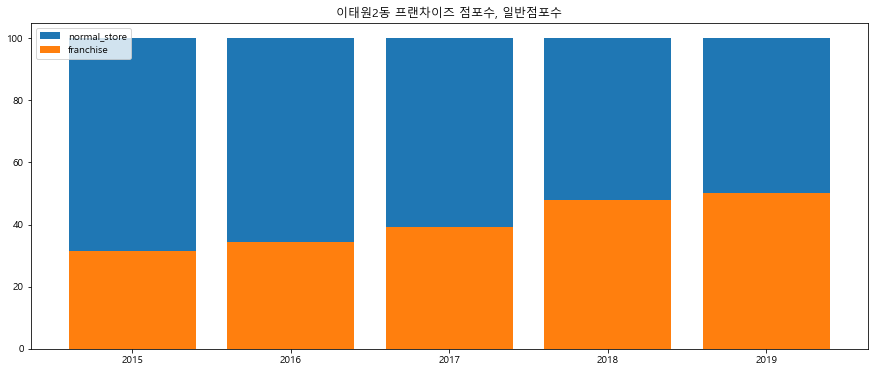

In [75]:
drawFranNormalgraph(yongsan_food,'이태원2동')